<a href="https://colab.research.google.com/github/CodeHunterOfficial/NLP_Spacy_Python/blob/main/Lecture_4_%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D1%81%D0%BC%D1%8B%D1%81%D0%BB%D0%B0_%D1%81%D0%BB%D0%BE%D0%B2_%D0%BF%D0%BE_%D0%B8%D1%85_%D1%87%D0%B0%D1%81%D1%82%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8F%D0%BC_%D1%81%D0%B5%D0%BC%D0%B0%D0%BD%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##План:
* Создание векторов тем с помощью анализа семантики (смысла). 
* Семантический поиск на основе сходства векторов тем. 
*  Масштабируемый семантический анализ и семантический поиск для больших корпусов текстов. 
* Семантические компоненты (темы) как признаки в конвейере NLP. 
* Ориентация в векторных пространствах высокой размерности.

Подбор числового представления семантики (смысла) слов и предложений — непростая задача, особенно для «нечетких» языков, таких как английский, с множеством диалектов и различных значений одного слова. Даже написание текста профессоромлингвистом не отменяет наличия у большинства слов английского языка нескольких значений — головная боль для учащихся — как людей, так и машин. Концепция нескольких значений у слов называется многозначностью (polysemy). 


* Многозначность — существование слов и фраз, у которых более одного смысла. Многозначность может влиять на семантику слов или высказываний по-разному. Мы перечислим эти варианты ниже, чтобы вы оценили всю широту возможностей LSA. Не стоит волноваться об этих сложностях, LSA берет их на себя. 
* Омонимы — слова с одинаковым написанием и произношением, но различным смыслом. 
* Зевгма — использование в одном предложении сразу двух значений одного слова. LSA способен справиться с некоторыми сложными задачами, возникающими вследствие многозначности в голосовом интерфейсе — при использовании голосовых чат-ботов, например Alexa или Siri. 
* Омографы — слова с одинаковым написанием, но различным произношением и смыслом. 
* Омофоны — слова с одинаковым произношением, но различным написанием и смыслом (непростая задача для NLP в случае голосового интерфейса). 

Представьте, как сложно было бы обработать следующее высказывание, не будь таких инструментов, как LSA: She felt … less. She felt tamped down. Dim. More faint. Feint. Feigned. Fain (Патрик Ротфус). 

С учетом этих непростых задач как бы вы втиснули вектор TF-IDF из миллиона измерений (термов) в вектор из примерно 200 измерений (тем)? Это словно искать сочетание основных цветов, которое бы давало такой оттенок, как в вашей квартире, чтобы закрасить отверстия от гвоздей в стене. 

Необходимо найти «соответствующие» друг другу в теме измерения слов и сложить их векторы TF-IDF. В результате получится новое число, отражающее долю данной темы в документе. Можно даже умножить их на веса, отражающие их важность для темы в целом, степень вложения каждого отдельного слова в «смесь», а для слов, снижающих вероятность того, что текст посвящен данной теме, можно использовать отрицательные веса.


## Мысленный эксперимент

## Пример.
Предположим, для определенного документа имеется вектор TF-IDF, и мы хотим преобразовать его в вектор темы. Представьте, насколько каждое слово влияет на тему документа.
Предположим, мы обрабатываем несколько предложений о домашних животных в Центральном парке Нью-Йорка (NYC). Мы создали 3 темы: одну, связанную с домашними животными, одну, связанную с животными, и одну, связанную с городами. Мы можем назвать эти темы соответственно "petness” “animalness", “cityness”. Таким образом, тема “petness” будет давать высокие оценки таким словам, как “cat" и "dog", но, скорее всего, проигнорирует такие слова, как «NYC» и "apple". Тема "city" игнорирует такие слова, как "cat" и "dog", но может дать "apple" несколько очков из-за лиги «Big Apple».

Посмотрите на код:

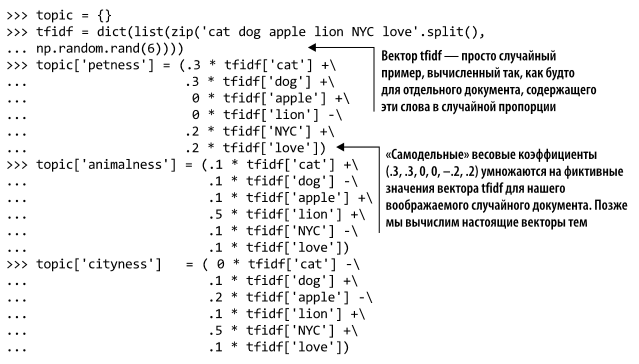

In [4]:
import numpy as np
topic={}
# Этот вектор tfidf является случайным примером, как если бы
# Рассчитывается для документа со случайными пропорциями этих слов
tfidf=dict(list(zip('cat dog apple lion NYC love'.split(), np.random.rand(6))))
print(tfidf)

{'cat': 0.23787688717697242, 'dog': 0.028320054517488757, 'apple': 0.1340012898391426, 'lion': 0.8422518878463426, 'NYC': 0.8838150640556861, 'love': 0.623888430615926}


Вручную установить веса (0,3, 0,3, 0, 0, -0,2, 0,2)
 Умножьте на фиктивное значение tfidf выше, чтобы создать векторы тем для фиктивных случайных документов.

In [5]:
topic['petness'] = (.3 * tfidf['cat'] + .3 * tfidf['dog'] + 0 * tfidf['apple'] + 0 * tfidf['lion'] - .2 * tfidf['NYC'] + .2 * tfidf['love'])
topic['animalness'] = (.1 * tfidf['cat'] + .1 * tfidf['dog'] - .1 * tfidf['apple'] + .5 * tfidf['lion'] + .1 * tfidf['NYC'] - .1 * tfidf['love'])
topic['cityness'] = ( 0 * tfidf['cat'] - .1 * tfidf['dog'] + .2 * tfidf['apple'] - .1 * tfidf['lion'] + .5 * tfidf['NYC'] + .1 * tfidf['love'])
print(topic)

{'petness': 0.02787375582038633, 'animalness': 0.4603381724526792, 'cityness': 0.44403943882088104}


 Отношения между словами и темами могут быть перевернуты. 3 тематических векторных набора
 
  Результирующая матрица 3 × 6 может быть транспонирована для получения тематических весов для каждого слова в словаре.
 
 Рассчитать тематический вес слова

In [6]:
word_vector = {}
word_vector['cat'] = .3*topic['petness'] + .1*topic['animalness'] +  0*topic['cityness']
word_vector['dog'] = .3*topic['petness'] +  .1*topic['animalness'] -  .1*topic['cityness']
word_vector['apple']= 0*topic['petness'] -  .1*topic['animalness'] +  .2*topic['cityness']
word_vector['lion'] = 0*topic['petness'] +  .5*topic['animalness'] -  .1*topic['cityness']
word_vector['NYC'] = -.2*topic['petness'] +  .1*topic['animalness'] + .5*topic['cityness']
word_vector['love'] = .2*topic['petness'] -  .1*topic['animalness'] +  .1*topic['cityness']
print(word_vector)

{'cat': 0.05439594399138382, 'dog': 0.009992000109295712, 'apple': 0.04277407051890829, 'lion': 0.1857651423442515, 'NYC': 0.2624787854916312, 'love': 0.003944877800897452}


В этом мысленном эксперименте мы сложили частотности слов, которые могут указывать на каждую из наших тем. Задали веса для частотностей слов (значений TF-IDF) в зависимости от того, насколько слово связано с конкретной темой. То же самое, только со знаком минус сделали для слов, указывающих на нечто в каком-то смысле противоположное теме. Конечно, это не настоящий анализ алгоритма или пример реализации, а просто мысленный эксперимент. В нем мы пытаемся понять, как обучить машину думать так, как человек. Мы произвольно разбиваем слова и документы всего на три темы (petness, animalness и cityness). Да и словарь ограничен шестью словами. 

Следующий шаг: разобраться, как бы человек мог математически определить, какие темы и слова связаны и какие веса должны быть у этих связей. После выбора трех тем для модели, необходимо подобрать веса всех слов для этих тем. Мы смешали слова в таком соотношении друг к другу, чтобы превратить тему в «смешение цветов». Преобразование тематического моделирования (рецепт смешения цветов) представляет собой матрицу соотношений (весов) 3 × 6, задающую соответствия трех тем и шести слов. Мы умножили эту матрицу на воображаемый вектор TF-IDF 6 × 1 и получили вектор темы 3 × 1 для данного документа. 

Связи между словами и темами можно «отобразить зеркально». Нужно транспонировать матрицу 3 × 6 трех векторов тем и получить веса тем для всех слов словаря. Эти векторы весов будут векторами для наших шести слов: 

In [18]:
word_vector = {}
word_vector['cat']  =  .3*topic['petness'] +\
                        .1*topic['animalness'] +\
                         0*topic['cityness']
word_vector['cat']               

0.05439594399138382

In [19]:
word_vector['dog']  =  .3*topic['petness'] +\
                        .1*topic['animalness'] -\
                        .1*topic['cityness']
word_vector['dog']

0.009992000109295712

In [16]:
word_vector['apple']=   0*topic['petness'] -\
                        .1*topic['animalness'] +\
                        .2*topic['cityness']
word_vector['apple']

0.04277407051890829

In [15]:
word_vector['lion'] =   0*topic['petness'] +\
                        .5*topic['animalness'] -\
                        .1*topic['cityness']
word_vector['lion']

0.1857651423442515

In [14]:
word_vector['NYC']  = -.2*topic['petness'] +\
                        .1*topic['animalness'] +\
                        .5*topic['cityness']
word_vector['NYC']

0.2624787854916312

In [13]:
word_vector['love'] =  .2*topic['petness'] -\
                        .1*topic['animalness'] +\
                        .1*topic['cityness']
word_vector['love'] 

0.003944877800897452

Эти шесть векторов (показанные на рис. 4.1), по одному для каждого слова, отражают значения наших шести слов в виде трехмерных векторов.

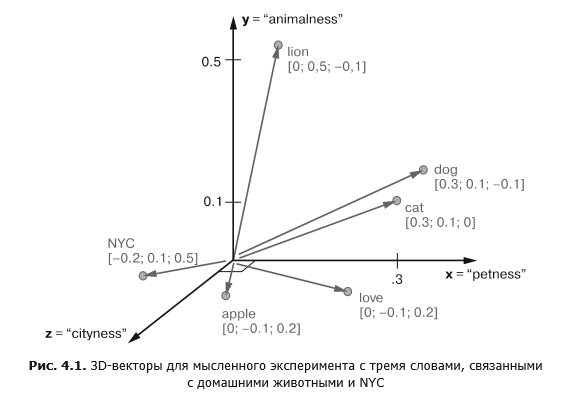

## LDA-классификатор

LDA — одна из самых простых и быстродействующих моделей понижения размерности и классификации. Скорее всего, эта книга — практически единственное место, где можно о ней прочитать, поскольку данный метод не слишком «раскручен». Но во многих приложениях его точность намного выше, чем у более навороченных современных алгоритмов, опубликованных в недавних статьях. LDA-классификатор — алгоритм обучения с учителем, так что нам понадобятся метки для классов документов. Но число требуемых для LDA выборок намного меньше, чем для упомянутых навороченных алгоритмов. 

В этом примере мы приведем упрощенную реализацию LDA, которой нет в библиотеке scikit-learn. Обучение модели состоит лишь из трех шагов, так что их можно произвести непосредственно на Python. 

* Вычислить среднее местоположение (центроид) всех векторов TF-IDF, входящих в класс (например, являющихся спамом СМС). 

*  Вычислить среднее местоположение (центроид) всех векторов TF-IDF, не входящих в класс (например, не являющихся спамом СМС). 

* Вычислить разность векторов между центроидами (связывающую их напрямую)

Для обучения модели LDA достаточно найти вектор (прямую) между центроидами бинарного класса. LDA — алгоритм машинного обучения с учителем, так что для сообщений нужны метки. Для выполнения вывода (предсказания) с помощью этой модели достаточно выяснить, ближе ли новый вектор TF-IDF к центроиду векторов, входящих в класс (спам), или к центроиду не входящих (не спам). Сначала обучим LDA-модель классифицировать СМС как спам или не спам (листинг 4.1).


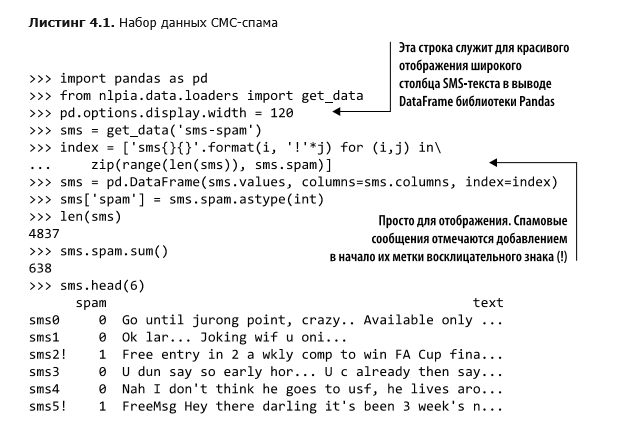

In [21]:
import pandas as pd
pd.options.display.width = 120
DATA_DIR = ('https://gitlab.com/tangibleai/nlpia/-/raw/master/src/nlpia/data')
url= DATA_DIR + '/toxic_comment_small.csv'
comments = pd.read_csv(url)
index = ['comment{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(comments)), comments.toxic)]
comments = pd.DataFrame(comments.values, columns=comments.columns, index=index)
mask = comments.toxic.astype(bool).values
comments['toxic'] = comments.toxic.astype(int)
len(comments)

5000

In [22]:
comments.toxic.sum()

650

In [23]:
comments.head(6)

,text,toxic
comment0,you have yet to identify where my edits violat...,0
comment1,"""\n as i have already said,wp:rfc or wp:ani. (...",0
comment2,your vote on wikiquote simple english when it ...,0
comment3,your stalking of my edits i've opened a thread...,0
comment4!,straight from the smear site itself. the perso...,1
comment5,"no, i can't see it either - and i've gone back...",0


Итак, у нас 5000 сообщений, 650 из которых были маркированы меткой бинарного класса spam. Теперь выполним токенизацию и преобразование векторов TF-IDF для всех этих СМС: 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_tokenize(sentence):
    return [token.text for token in nlp(sentence.lower())]

tfidf_model = TfidfVectorizer(tokenizer=spacy_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=comments.text).toarray()
tfidf_docs.shape

(5000, 19160)

In [31]:
comments.toxic.sum()

650

В результате применения nltk.casual_tokenizer в нашем словаре оказывается 19160 слова — почти вдвое больше, чем сообщений. И почти в десять раз больше слов, чем спамовых сообщений. Так что у модели не так много информации о словах, которая бы указывала, является сообщение спамом или нет. Обычно наивный байесовский классификатор работает плохо, если словарь намного больше числа маркированных примеров в наборе данных. Здесь помогут методы семантического анализа, изложенные в этой главе. 

Начнем с простейшего метода семантического анализа — LDA. Можно воспользоваться моделью LDA из sklearn.discriminant_analysis.LinearDiscriminantAnalysis. Но для обучения модели достаточно вычислить центроиды бинарного класса (спам и не спам), так что можно сделать это вручную:


In [33]:
mask = comments.toxic.astype(bool).values
toxic_centroid = tfidf_docs[mask].mean(axis=0)
nontoxic_centroid = tfidf_docs[~mask].mean(axis=0)
mask

array([False, False, False, ...,  True,  True, False])

In [34]:
toxic_centroid

array([0.06333362, 0.04337385, 0.00144948, ..., 0.        , 0.        ,
       0.        ])

In [35]:
nontoxic_centroid

array([1.57443630e-02, 8.33050299e-02, 5.90118296e-04, ...,
       2.54386426e-05, 1.86706908e-05, 6.71128484e-05])

In [36]:
centroid_axis = toxic_centroid - nontoxic_centroid
toxicity_score = tfidf_docs.dot(centroid_axis)
toxicity_score.round(3)

array([-0.007, -0.025, -0.013, ..., -0.023, -0.   , -0.02 ])

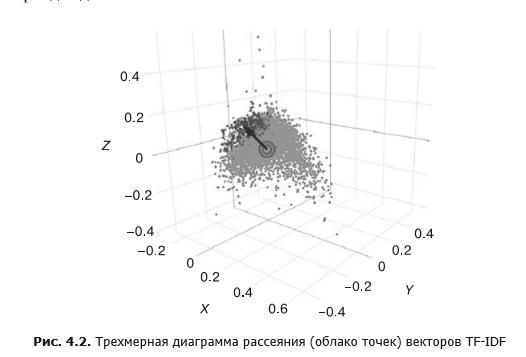

In [37]:
from sklearn.preprocessing import MinMaxScaler
comments['manual_score'] = MinMaxScaler().fit_transform(toxicity_score.reshape(-1,1))
comments['manual_predict'] = (comments.manual_score > .5).astype(int)
comments['toxic manual_predict manual_score'.split()].round(2).head(6)

,toxic,manual_predict,manual_score
comment0,0,0,0.48
comment1,0,0,0.28
comment2,0,0,0.41
comment3,0,1,0.55
comment4!,1,1,0.55
comment5,0,0,0.39


Выглядит хорошо. Все шесть первых сообщений были классифицированы правильно при пороговом значении 50 %. Посмотрим, что получится на остатке тренировочного набора данных: 

In [45]:
(1. - (comments.toxic - comments.manual_predict).abs().sum() / len(comments)).round(3)

0.818

Ух ты! С помощью этой простой модели удалось правильно классифицировать 81.8% сообщений. На практике вряд ли удастся добиться такого результата, поскольку здесь мы не выделили тестовый набор данных. Модель получила отметку «5 с плюсом» на уже виденных классификатором «экзаменационных вопросах». Но LDA — очень простая модель с небольшим числом параметров, так что она должна легко поддаваться обобщению, если ваши СМС будут соответствовать тем сообщениям, которые планируется классифицировать. Запустите ее на ваших собственных примерах. Или, еще лучше, загляните в приложение Д и узнайте, как произвести так называемую кросс-валидацию. 

Таковы возможности методов семантического анализа. В отличие от наивного байесовского классификатора и модели логистической регрессии семантический анализ не основывается на отдельных словах1. Он собирает слова со схожей семантикой (например, спамовостью) и использует их вместе. Помните, что словарь данного тренировочного набора ограничен и включает некоторые не английские слова. Так что для правильной классификации ваши контрольные сообщения должны использовать подобный же словарный запас. 

Взглянем, как выглядит матрица различий для тренировочного набора данных. Она демонстрирует, сколько отмеченных как спам СМС на самом деле им не были (ложноположительные результаты) и сколько помеченных как не спам следовало пометить как спам (ложноотрицательные результаты): 

In [46]:
!pip install pugnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 706 kB 14.7 MB/s 
     |████████████████████████████████| 210 kB 57.5 MB/s 
     |████████████████████████████████| 120 kB 61.3 MB/s 
     |████████████████████████████████| 1.6 MB 29.6 MB/s 
     |████████████████████████████████| 170 kB 67.6 MB/s 
     |████████████████████████████████| 2.2 MB 56.4 MB/s 
     |████████████████████████████████| 82 kB 864 kB/s 


In [47]:
from pugnlp.stats import Confusion 
Confusion(comments['toxic manual_predict'.split()])

/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
/usr/local/lib/python3.7/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/usr/local/lib/python3.7/dist-packages/pugnlp/tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/pugnlp/util.py:80: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/pugnl

manual_predict,0,1
toxic,,
0,3576,774
1,136,514


Выглядит неплохо. Если ложноположительных (774) или ложноотрицательных (136) результатов непропорционально много, можно изменить пороговое значение 0.5. Теперь вы подготовлены к рассказу о моделях, умеющих вычислять многомерные семантические векторы вместо одномерных семантических показателей. До сих пор наши одномерные векторы понимали только, является слово/документ спамом или нет. Мы обучим их понимать гораздо больше нюансов слов и предоставим вам многомерный вектор, захватывающий смысл слова. Прежде чем углубиться в SVD (математические основы многомерного LSA), мы упомянем еще несколько подходов.

##Еще один «дальний родственник» 

Как уже говорилось, у LSA есть еще один «дальний родственник» с похожей аббревиатурой — LDiA. Расшифровывается как латентное размещение Дирихле (latent Dirichlet allocation)1. Можно также применять для генерации векторов, захватывающих семантику слова или документа. 

LDiA применяет математику LSA по-другому. Для группировки слов в нем используется нелинейный статистический алгоритм. В результате обучение занимает намного больше времени, чем при линейных подходах, таких как LSA. Из-за этого LDiA часто оказывается менее подходящим для многих реальных приложений, и его редко имеет смысл пробовать первым. Но создаваемые им сводные показатели тем иногда точнее отражают интуитивные представления человека относительно слов и тем. Так что полученные с помощью LDiA темы будет проще объяснить своему начальнику. 

LDiA полезен для решения некоторых однодокументных задач, например для автоматического реферирования документов. Документ играет роль корпуса, а предложения в этом корпусе — документов. Именно так gensim и другие пакеты используют LDiA для обнаружения наиболее важных предложений документа. Далее путем соединения этих предложений можно создать машинно-генерируемый реферат документа2. Для большинства задач классификации и регрессии лучше подойдет LSA. Так что мы расскажем сначала про LSA и лежащую в его основе линейную алгебру SVD.


## Воплощаем мысленный эксперимент  на практике 

Воспользуемся алгоритмом для вычисления каких-нибудь тем, например animalness, petness и cityness из нашего мысленного эксперимента. Мы не можем сообщить алгоритму LSA, к чему относятся эти темы1. Просто попробуем и посмотрим, что получится. Захват семантики коротких документов вроде твитов, сообщений в чате или строк стихотворений из маленького корпуса требует всего нескольких измерений (тем) (листинг 4.2).


In [51]:
#from nlpia.book.examples.ch04_catdog_lsa_3x6x16 import word_topic_vectors
#word_topic_vectors.T.round(1) 

#from https://github.com/totalgood/nlpia/blob/master/src/nlpia/book/examples/ch04_catdog_lsa_3x6x16.py import word_topic_vectors

SyntaxError: ignored

In [53]:
!pip install nlpia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.0 MB 1.2 MB/s 


In [54]:
from nlpia.data.loaders import get_data
from nltk.tokenize import casual_tokenize
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.stem import PorterStemmer
from sklearn.decomposition import PCA
from nlpia.constants import DATA_PATH


NUM_TOPICS = 3
NUM_WORDS = 6
NUM_DOCS = NUM_PRETTY = 16
SAVE_SORTED_CORPUS = ''  # 'cats_and_dogs_sorted.txt'
# import nltk
# nltk.download('wordnet')  # noqa
# from nltk.stem.wordnet import WordNetLemmatizer


# STOPWORDS = 'a an and or the do are with from for of on in by if at to into them'.split()
# STOPWORDS += 'to at it its it\'s that than our you your - -- " \' ? , . !'.split()
STOPWORDS = []

# SYNONYMS = dict(zip(
#     'wolv people person women woman man human he  we  her she him his hers'.split(),
#     'wolf her    her    her   her   her her   her her her her her her her'.split()))
# SYNONYMS.update(dict(zip(
#     'ate pat smarter have had isn\'t hasn\'t no  got get become been was were wa be sat seat sit'.split(),
#     'eat pet smart   has  has not    not     not has has is     is   is  is   is is sit sit  sit'.split())))
# SYNONYMS.update(dict(zip(
#     'i me my mine our ours catbird bird birds birder tortoise turtle turtles turtle\'s don\'t'.split(),
#     'i i  i  i    i   i    bird    bird birds bird   turtle   turtle turtle  turtle    not'.split())))
SYNONYMS = {}

stemmer = None  # PorterStemmer()

pd.options.display.width = 110
pd.options.display.max_columns = 14
pd.options.display.max_colwidth = 32




def normalize_corpus_words(corpus, stemmer=stemmer, synonyms=SYNONYMS, stopwords=STOPWORDS):
    docs = [doc.lower() for doc in corpus]
    docs = [casual_tokenize(doc) for doc in docs]
    docs = [[synonyms.get(w, w) for w in words if w not in stopwords] for words in docs]
    if stemmer:
        docs = [[stemmer.stem(w) for w in words if w not in stopwords] for words in docs]
    docs = [[synonyms.get(w, w) for w in words if w not in stopwords] for words in docs]
    docs = [' '.join(w for w in words if w not in stopwords) for words in docs]
    return docs


def tokenize(text, vocabulary, synonyms=SYNONYMS, stopwords=STOPWORDS):
    doc = normalize_corpus_words([text.lower()], synonyms=synonyms, stopwords=stopwords)[0]
    stems = [w for w in doc.split() if w in vocabulary]
    return stems


fun_words = vocabulary = 'cat dog apple lion nyc love big small'
fun_stems = normalize_corpus_words([fun_words])[0].split()[:NUM_WORDS]
fun_words = fun_words.split()


if SAVE_SORTED_CORPUS:
    tfidfer = TfidfVectorizer(min_df=2, max_df=.6, stop_words=None, token_pattern=r'(?u)\b\w+\b')

    corpus = get_data('cats_and_dogs')[:NUM_DOCS]
    docs = normalize_corpus_words(corpus, stemmer=None)
    tfidf_dense = pd.DataFrame(tfidfer.fit_transform(docs).todense())
    id_words = [(i, w) for (w, i) in tfidfer.vocabulary_.items()]
    tfidf_dense.columns = list(zip(*sorted(id_words)))[1]


    word_tfidf_dense = pd.DataFrame(tfidfer.transform(fun_stems).todense())
    word_tfidf_dense.columns = list(zip(*sorted(id_words)))[1]
    word_tfidf_dense.index = fun_stems
    """
    >>> word_tfidf_dense[fun_stems]
          cat  dog  anim  pet  citi  appl  nyc  car  bike  hat
    cat   1.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0  0.0
    dog   0.0  1.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0  0.0
    anim  0.0  0.0   1.0  0.0   0.0   0.0  0.0  0.0   0.0  0.0
    pet   0.0  0.0   0.0  1.0   0.0   0.0  0.0  0.0   0.0  0.0
    citi  0.0  0.0   0.0  0.0   1.0   0.0  0.0  0.0   0.0  0.0
    appl  0.0  0.0   0.0  0.0   0.0   1.0  0.0  0.0   0.0  0.0
    nyc   0.0  0.0   0.0  0.0   0.0   0.0  1.0  0.0   0.0  0.0
    car   0.0  0.0   0.0  0.0   0.0   0.0  0.0  1.0   0.0  0.0
    bike  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   1.0  0.0
    hat   0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0  1.0
    """

    tfidfer.use_idf = False
    tfidfer.norm = None
    bow_dense = pd.DataFrame(tfidfer.fit_transform(docs).todense())
    bow_dense.columns = list(zip(*sorted(id_words)))[1]
    bow_dense = bow_dense.astype(int)
    tfidfer.use_idf = True
    tfidfer.norm = 'l2'


    """
    >>> tfidf_dense.shape
    (200, 170)
    """


    bow_pretty = bow_dense.copy()
    bow_pretty = bow_pretty[fun_stems]
    bow_pretty['text'] = corpus

    tfidf_pretty = tfidf_dense.copy()
    tfidf_pretty = tfidf_pretty[fun_stems]
    tfidf_pretty['diversity'] = tfidf_pretty[fun_stems].T.sum().values
    tfidf_pretty['text'] = corpus
    # tfidf_pretty['diversity'] = [(row.diversity or 0) / ((float(row.iloc[i % (len(row) - 2)] or 1) ** 2))
    #                              for i, row in tfidf_pretty.iterrows()]
    tfidf_pretty = tfidf_pretty.sort_values('diversity', ascending=False).round(2)
    with open(os.path.join(DATA_PATH, SAVE_SORTED_CORPUS), 'w') as fout:
        fout.write('\n'.join(list(tfidf_pretty.text.values)))

    for col in fun_stems:
        bow_pretty.loc[bow_pretty[col] == 0, col] = ''
    # print(bow_pretty.head())


# do it all over again on a tiny portion of the corpus and vocabulary
corpus = get_data('cats_and_dogs_sorted')[:NUM_PRETTY]
docs = normalize_corpus_words(corpus)
tfidfer = TfidfVectorizer(min_df=1, max_df=.99, stop_words=None, token_pattern=r'(?u)\b\w+\b',
                          vocabulary=fun_stems)
tfidf_dense = pd.DataFrame(tfidfer.fit_transform(docs).todense())
id_words = [(i, w) for (w, i) in tfidfer.vocabulary_.items()]
tfidf_dense.columns = list(zip(*sorted(id_words)))[1]
tfidfer.use_idf = False
tfidfer.norm = None
bow_dense = pd.DataFrame(tfidfer.fit_transform(docs).todense())
bow_dense.columns = list(zip(*sorted(id_words)))[1]
bow_dense = bow_dense.astype(int)
tfidfer.use_idf = True
tfidfer.norm = 'l2'
bow_pretty = bow_dense.copy()
bow_pretty = bow_pretty[fun_stems]
bow_pretty['text'] = corpus
for col in fun_stems:
    bow_pretty.loc[bow_pretty[col] == 0, col] = ''
# print(bow_pretty)
word_tfidf_dense = pd.DataFrame(tfidfer.transform(fun_stems).todense())
word_tfidf_dense.columns = list(zip(*sorted(id_words)))[1]
word_tfidf_dense.index = fun_stems

tfidf_pretty = tfidf_dense.copy()
tfidf_pretty = tfidf_pretty[fun_stems]
tfidf_pretty = tfidf_pretty.round(2)
for col in fun_stems:
    tfidf_pretty.loc[tfidf_pretty[col] == 0, col] = ''
# tfidf_pretty[:text]tfidf_pretty.text.str[:16]
# print(tfidf_pretty)


"""
>>> pd.options.display.width = 150
>>> pd.options.display.max_columns = 16
>>> tfidf_pretty = tfidf_dense.copy()
>>> tfidf_pretty = tfidf_pretty[['bike', 'cat', 'car', 'chase', 'dog', 'hat', 'i']].head(10).round(1)
>>> tfidf_pretty[tfidf_pretty == 0] = ''
>>> tfidf_pretty['...'] = ''
>>> tfidf_pretty['text'] = corpus[:10]
>>> tfidf_pretty
   dog  cat bear  pet  hat bike chase bark meow ...                                         text
0       0.4            0.9                                                    The Cat in the Hat
1       0.5                                                                   The cat ate a rat.
2       0.6                       0.8                           The cat chased my laser pointer.
3  0.3                      0.6   0.4  0.6               A dog chased my bike and barked loudly.
4  0.4                                 0.6                           I ran from the barking dog.
5  0.4                            0.5  0.6                        A dog chased the car, barking.
6       0.5                                 0.9                                   The Cat's Meow
7       0.3       0.4                       0.5      The cat meowed so I pet it until it purred.
8       0.5                                 0.9                 A cat meowed on the hot tin roof
9  0.5  0.4                                                      Cats and dogs playing together.
"""

tfidf_zeros = tfidf_dense.T.sum()[tfidf_dense.T.sum() == 0]
# print(tfidf_zeros)
"""
>>> tfidf_zeros = tfidf_dense.T.sum()[tfidf_dense.T.sum() == 0]
>>> tfidf_zeros
199    0.0
"""

[corpus[i] for i in tfidf_zeros.index]
"""
>>> [corpus[i] for i in tfidf_zeros.index]
[]

# ['I flew a kite.', 'He froze.']
"""

pcaer = PCA(n_components=NUM_TOPICS)

doc_topic_vectors = pd.DataFrame(pcaer.fit_transform(tfidf_dense.values), columns=['top{}'.format(i) for i in range(NUM_TOPICS)])
doc_topic_vectors['text'] = corpus
pd.options.display.max_colwidth = 55
# doc_topic_vectors.round(1)
"""
>>> doc_topic_vectors.round(1)
    topic_A  topic_B  topic_C  topic_D                                                             text
0      -0.2      0.1      0.5     -0.2  Animals don't drive cars, but my pet dog likes to stick his ...
1       0.1      0.1     -0.0     -0.3              The Cat in the Hat is not about an animal or a hat.
2       0.1     -0.2      0.5     -0.3                   Cats don't like riding into the city in a car.
3      -0.2     -0.5      0.0      0.3                      Dogs love to chase cars, trucks, and bikes.
4      -0.2     -0.3      0.2      0.1        Wild cats chase bikes and runners but not cars or trucks.
5      -0.1     -0.0      0.6     -0.2              Animals, including pets, don't like riding in cars.
6       0.6      0.0     -0.1      0.0                                 NYC is a city that never sleeps.
7       0.7      0.1      0.0      0.2                                  Come to NYC. See the Big Apple!
8       0.8      0.1      0.0      0.2                                   NYC is known as the Big Apple.
9       0.7      0.1     -0.0      0.1  NYC is the only city where you can hardly find a typical Ame...
10     -0.2     -0.1     -0.5     -0.3                                         It rained cats and dogs.
11     -0.4      0.5     -0.0      0.4                                               I love my pet cat.
12      0.3      0.1     -0.1      0.4                                      I love New York City (NYC).
13     -0.2      0.3      0.2     -0.2                                      He pet the dog on the head.
14     -0.2     -0.5      0.2      0.0                                         Dogs like to chase cars.
15     -0.2     -0.1     -0.3     -0.1                          The cat steered clear of the dog house.
16     -0.1     -0.4      0.3      0.1                                         The car had a bike rack.
"""

word_topic_vectors = pd.DataFrame(pcaer.transform(word_tfidf_dense.values),
                                  columns=['top{}'.format(i) for i in range(NUM_TOPICS)])
word_topic_vectors.index = fun_stems


"""
>>> tfidf_similarity = []
... topic_similarity = []
... for i in range(10):
...     topic_similarity.append((doc_topic_vectors.iloc[i] * doc_topic_vectors.iloc[i+1]).sum())
...     tfidf_similarity.append((tfidf_dense.iloc[i] * tfidf_dense.iloc[i+1]).sum())
>>> tfidf_pretty['tfidf_similar'] = tfidf_similarity
>>> tfidf_pretty['topic_similar'] = topic_similarity
>>> tfidf_pretty
  bike  cat  car chase  dog  hat    i ...                                     text  tfidf_similar  topic_similar
0       0.4                  0.9                                The Cat in the Hat       0.217066       0.208128
1       0.5                                                     The cat ate a rat.       0.000000      -0.085262
2  0.5                            0.6                         I rode my bike home.       0.000000      -0.075669
3            0.5                                         The car is in the garage.       0.267063       0.045623
4            0.5   0.5  0.4                               Dogs like to chase cars.       0.620088       0.214047
5                       0.4                            The post man likes our dog.       0.316328       0.164364
6                       0.3                  He refused to sleep in the dog house.       0.000000      -0.057364
7       0.6        0.8                                     The cat chased a mouse.       0.000000      -0.004849
8                       0.4       0.4           I was in the dog house last night.       0.488741       0.025706
9       0.3             0.3                The cat steered clear of the dog house.       0.000000       0.011857
"""


def tfidf_search(text, corpus=tfidf_dense, corpus_text=corpus):
    """ search for the most relevant document """
    tokens = tokenize(text, vocabulary=corpus.columns)
    tfidf_vector_query = np.array(tfidfer.transform([' '.join(tokens)]).todense())[0]
    query_series = pd.Series(tfidf_vector_query, index=corpus.columns)

    return corpus_text[query_series.dot(corpus.T).values.argmax()]


def topic_search(text, corpus=doc_topic_vectors, pcaer=pcaer, corpus_text=corpus):
    """ search for the most relevant document """
    tokens = tokenize(text, vocabulary=corpus.columns)
    tfidf_vector_query = np.array(tfidfer.transform([' '.join(tokens)]).todense())[0]
    topic_vector_query = pcaer.transform([tfidf_vector_query])
    query_series = pd.Series(topic_vector_query, index=corpus.columns)
    return corpus_text[query_series.dot(corpus.T).values.argmax()]


"""
tfidf_search('Hello world, do you have a cat?')

topic_search('Hello world, do you have a cat?')
# 'Do you have a pet?'

search('The quick brown fox jumped over the lazy dog')
# 'The dog sat on the floor.'

search('A dog barked at my car incessantly.')
# 'A dog chased the car, barking.'
tokenize('A dog barked at my car incessantly.')
# ['dog', 'bark', 'at', 'car', 'incessantli']

search('A Rotweiller barked at my car incessantly.')
# 'The cat hated getting in the car.'
tokenize('A Rotweiller barked at my car incessantly.')
# ['rotweil', 'bark', 'at', 'car', 'incessantli']

list(df.columns)
# ['ate', 'can', 'car', 'cat', 'chase', 'cute', 'die', 'dog', 'ferret', 'flower', 'hair',
# 'hat', 'have', 'it', 'kitten', 'pet', 'ran',
#   'squirrel', 'struck', 'took', 'tree', 'trick', 'turtl', 'up', 'vet', 'water'],
"""
U, Sigma, VT = np.linalg.svd(tfidf_dense.T)  # <1> Transpose the doc-word tfidf matrix, because SVD works on column vectors
S = Sigma.copy()
S[4:] = 0
doc_labels = ['doc{}'.format(i) for i in range(len(tfidf_dense))]
U_df = pd.DataFrame(U, index=fun_stems, columns=fun_stems)
VT_df = pd.DataFrame(VT, index=doc_labels, columns=doc_labels)
ndim = 2
truncated_tfidf = U[:, :ndim].dot(np.diag(Sigma)[:ndim, :ndim]).dot(VT.T[:, :ndim].T)
"""
The left singular vectors tell you how to "rotate" the TF-IDF vectors into the topic space, equivalent to creating topics

>>> U_df
       cat   dog  appl   nyc   car  bike   hat
cat  -0.53  0.01 -0.50  0.31 -0.49 -0.00 -0.36
dog  -0.60  0.25  0.19  0.43  0.56 -0.00  0.21
appl -0.16 -0.63  0.17 -0.12  0.37 -0.00 -0.63
nyc  -0.25 -0.69  0.06  0.04 -0.24  0.00  0.63
car  -0.35  0.17  0.32 -0.45 -0.21  0.71 -0.03
bike -0.35  0.17  0.32 -0.45 -0.21 -0.71 -0.03
hat  -0.17  0.00 -0.69 -0.55  0.40  0.00  0.19

>>> VT_df.round(2)
        doc0  doc1  doc2  doc3  doc4  doc5  doc6  doc7  doc8  doc9  doc10  doc11
doc0  -0.37 -0.34 -0.16 -0.22 -0.33 -0.33 -0.27 -0.15 -0.40 -0.40  -0.15  -0.15
doc1   0.19  0.12  0.00  0.01  0.16  0.16 -0.29 -0.51  0.11  0.11  -0.51  -0.51
doc2   0.33  0.11 -0.55 -0.58  0.25  0.25 -0.19  0.11 -0.13 -0.13   0.11   0.11
doc3  -0.31 -0.39 -0.39 -0.27 -0.07 -0.07  0.21 -0.06  0.48  0.48  -0.06  -0.06
doc4   0.03 -0.59  0.28  0.08  0.24  0.24 -0.61  0.14  0.10  0.10   0.14   0.14
doc5   0.00  0.00  0.00 -0.00  0.71 -0.71 -0.00 -0.00  0.00  0.00  -0.00  -0.00
doc6   0.16 -0.51  0.17 -0.10  0.27  0.27  0.62 -0.11 -0.23 -0.23  -0.11  -0.11
doc7  -0.04 -0.07 -0.36  0.41  0.09  0.09  0.00  0.67 -0.06 -0.06  -0.33  -0.33
doc8  -0.54  0.19  0.07 -0.08  0.27  0.27  0.00 -0.00  0.45 -0.55  -0.00  -0.00
doc9  -0.54  0.19  0.07 -0.08  0.27  0.27  0.00 -0.00 -0.55  0.45  -0.00  -0.00
doc10 -0.04 -0.07 -0.36  0.41  0.09  0.09  0.00 -0.33 -0.06 -0.06   0.67  -0.33
doc11 -0.04 -0.07 -0.36  0.41  0.09  0.09  0.00 -0.33 -0.06 -0.06  -0.33   0.67
Try to reconstruct an approximate TFIDF, using only 2 topics (from 7 words):

>>> tfidf_compressed = U[:,:2] @ (np.diag(S)[:2,:] @ VT[:2,:])
>>> tfidf_compressed.shape

array([[ 0.12191697,  0.01013273,  0.04009995, ...,  0.06057937,
         0.07675374, -0.00521042],
       [ 0.0352883 ,  0.07193914,  0.00248612, ...,  0.00928599,
         0.02413519,  0.02511732],
       [ 0.0886943 ,  0.0689894 ,  0.06191171, ...,  0.08041404,
        -0.0090325 ,  0.01368156],
       ...,
       [-0.00116523,  0.00980797,  0.00397578, ..., -0.00540478,
         0.04008382,  0.01717131],
       [ 0.08695312,  0.01880789,  0.04888827, ...,  0.0604496 ,
         0.04363558,  0.00425347],
       [ 0.06353676, -0.01267888,  0.0766847 , ...,  0.07791765,
         0.01870914,  0.00097211]])
"""


if __name__ == '__main__':
    print(word_topic_vectors.T.round(1))

/usr/local/lib/python3.7/dist-packages/nlpia/futil.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
/usr/local/lib/python3.7/dist-packages/nlpia/loaders.py:78: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  np = pd.np
100%|██████████| 263/263 [00:00<00:00, 200527.53it/s]

      cat  dog  apple  lion  nyc  love
top0 -0.6 -0.4    0.5  -0.3  0.4  -0.1
top1 -0.1 -0.3   -0.4  -0.1  0.1   0.8
top2 -0.3  0.8   -0.1  -0.5  0.0   0.1


In [55]:
word_topic_vectors.T.round(1)

,cat,dog,apple,lion,nyc,love
top0,-0.6,-0.4,0.5,-0.3,0.4,-0.1
top1,-0.1,-0.3,-0.4,-0.1,0.1,0.8
top2,-0.3,0.8,-0.1,-0.5,0.0,0.1


##Сингулярное разложение

 Именно алгоритм сингулярного разложения лежит в основе LSA. Начнем с корпуса из всего 11 документов и словаря из шести слов, подобного тому, что был в нашем мысленном эксперименте

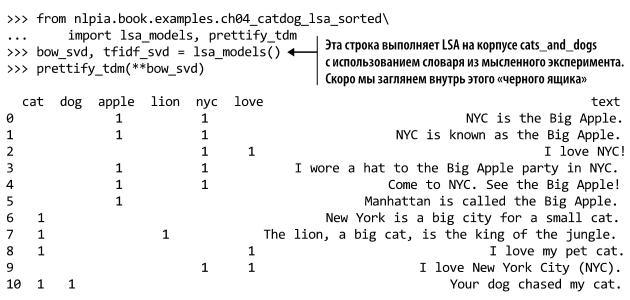

In [68]:
from  nlpia.book.examples.ch04_catdog_lsa_sorted import lsa_models,prettify_tdm
bow_svd, tfidf_svd=lsa_models()
prettify_tdm(**bow_svd)

100%|██████████| 263/263 [00:00<00:00, 124870.04it/s]


,cat,dog,apple,lion,nyc,love,text
0,,,1,,1,,NYC is the Big Apple.
1,,,1,,1,,NYC is known as the Big Apple.
2,,,,,1,1,I love NYC!
3,,,1,,1,,I wore a hat to the Big Apple party in NYC.
4,,,1,,1,,Come to NYC. See the Big Apple!
5,,,1,,,,Manhattan is called the Big Apple.
6,1,,,,,,New York is a big city for a small cat.
7,1,,,1,,,"The lion, a big cat, is the king of the jungle."
8,1,,,,,1,I love my pet cat.
9,,,,,1,1,I love New York City (NYC).


In [69]:
tdm = bow_svd['tdm']
tdm

,0,1,2,3,4,5,6,7,8,9,10
cat,0,0,0,0,0,0,1,1,1,0,1
dog,0,0,0,0,0,0,0,0,0,0,1
apple,1,1,0,1,1,1,0,0,0,0,0
lion,0,0,0,0,0,0,0,1,0,0,0
nyc,1,1,1,1,1,0,0,0,0,1,0
love,0,0,1,0,0,0,0,0,1,1,0


In [64]:
import  nlpia.book.examples.ch04_catdog_lsa_sorted 
nlpia.book.examples.ch04_catdog_lsa_sorted.prettify_tdm

<function nlpia.book.examples.ch04_catdog_lsa_sorted.prettify_tdm(tdm=None, docs=[], vocabulary=[], **kwargs)>